# Capstone: Visualizations

**San Francisco Police Department Incident Reports**

This notebook supports the visualizations for the final report of this Capstone Project. Please reference 
the [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md) 
for details.

## Imports & Utilities

### Imports

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg


# Import utilities
# import pathlib
import time

# Export dataFrame's as images
import dataframe_image as dfi

# import project utils
import sys
sys.path.append('../src')

import data_utils
from data_utils import Config

import graph_utils

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
# Configure logging
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# logging.getLogger().setLevel(logging.DEBUG)
# logging.getLogger().setLevel(logging.INFO)

### Utility Functions

In [8]:
def time_secs_to_msg(lapse_time_secs, mins_label='m', secs_label='s'):
    if lapse_time_secs <= 60:
        return f'{lapse_time_secs%60:.2f}{secs_label}'
    else:
        return f'{lapse_time_secs//60:,.0f}{mins_label} {lapse_time_secs%60:.2f}{secs_label}'

## The Data

Details for the data can be found in the project [README.md](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/README.md).

### Read the Data

In [11]:
# Which dataset to work from? Select sample size percentage

sample_file = data_utils.select_sample_csv_file(pct=10)
# sample_file = data_utils.select_sample_csv_file(pct=100)
# sample_file = data_utils.select_sample_csv_file(pct=75)
# sample_file = data_utils.select_sample_csv_file(pct=50)
# sample_file = data_utils.select_sample_csv_file(pct=25)

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean_10_pct.csv


In [12]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean_10_pct.csv ... Done: 89,458 rows, 37 columns
... Converting datetime to timeseries ... Done
... Setting index to datetime ... Done
Done


### Apply Feature Engineering Learnings

We will re-use the learnings from the Exploratory Data Analysis (EDA) and apply it to clean the data using two shared methods:

* `data_utils.preprocess_data()`
* `data_utils.fix_data_artifacts()`
* `data_utils.apply_synthetic_features()`

Please refer to the EDA notebook, 
[ExploratoryDataAnalysis.ipynb](https://github.com/fazeelgm/UCB_ML_AI_Capstone/blob/main/notebooks/ExploratoryDataAnalysis.ipynb), for details.

In [15]:
data = data_utils.preprocess_data(current_raw_df.copy())

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 dropped
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
... preprocess_drop_cols: Column current_supervisor_d

In [16]:
# Fix data value artifacts that were discovered during EDA
data = data_utils.fix_data_artifacts(data)

Fixing data artifacts (in-place) ... 
... Category column:
    ..."Human Trafficking*"
    ..."Motor Vehicle Theft"
    ..."Weapons Offence"
Done


Create the new, synthetic features that were introduced during EDA:

In [18]:
data = data_utils.apply_synthetic_features(data)

Generating synthetic feature columns (in-place) ... 
... Adding columns ['hour', 'minute', 'day', 'month']'
... Adding column ['weekend']
... Adding column ['season']
... Adding column ['holiday']
... Adding column ['tod']
Done


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82888 entries, 2024-08-01 08:01:00 to 2018-10-02 16:53:00
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             82888 non-null  object 
 1   time             82888 non-null  object 
 2   year             82888 non-null  int64  
 3   dow              82888 non-null  object 
 4   category         82888 non-null  object 
 5   resolution       82888 non-null  object 
 6   police_district  82888 non-null  object 
 7   neighborhood     82888 non-null  object 
 8   latitude         82888 non-null  float64
 9   longitude        82888 non-null  float64
 10  hour             82888 non-null  int64  
 11  minute           82888 non-null  int64  
 12  day              82888 non-null  int64  
 13  month            82888 non-null  int64  
 14  weekend          82888 non-null  int64  
 15  season           82888 non-null  object 
 16  holiday          82888 

In [20]:
data.head(2)

date   time  year       dow             category  \
datetime                                                                      
2024-08-01 08:01:00  2024/08/01  08:01  2024  Thursday  Other Miscellaneous   
2021-11-25 23:30:00  2021/11/25  23:30  2021  Thursday             Burglary   

                         resolution police_district    neighborhood  \
datetime                                                              
2024-08-01 08:01:00  Open or Active         Mission         Mission   
2021-11-25 23:30:00  Open or Active        Northern  Haight Ashbury   

                      latitude   longitude  hour  minute  day  month  weekend  \
datetime                                                                        
2024-08-01 08:01:00  37.768272 -122.419983     8       1    1      8        0   
2021-11-25 23:30:00  37.773757 -122.432467    23      30   25     11        0   

                     season  holiday      tod  
datetime                                       
2024-08-01 08:01:00  Summer    False  Morning  
2021-11-25 23:30:00    Fall    False  Evening

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82888 entries, 2024-08-01 08:01:00 to 2018-10-02 16:53:00
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             82888 non-null  object 
 1   time             82888 non-null  object 
 2   year             82888 non-null  int64  
 3   dow              82888 non-null  object 
 4   category         82888 non-null  object 
 5   resolution       82888 non-null  object 
 6   police_district  82888 non-null  object 
 7   neighborhood     82888 non-null  object 
 8   latitude         82888 non-null  float64
 9   longitude        82888 non-null  float64
 10  hour             82888 non-null  int64  
 11  minute           82888 non-null  int64  
 12  day              82888 non-null  int64  
 13  month            82888 non-null  int64  
 14  weekend          82888 non-null  int64  
 15  season           82888 non-null  object 
 16  holiday          82888 

In [22]:
# data.to_csv('../data/incidents_10.csv')

## SF Crime Location-based Maps

### Geo-Data Attributions

According to [LatLong.net](https://www.latlong.net/place/san-francisco-bay-area-ca-usa-32614.html) the San Francisco County is bounded by the following rectangle:

* Latitude Range:
  * Northern limit: 37.8330° N
  * Southern limit: 37.7031° N
* Longitude Range:
  * Western limit: -122.52279° W
  * Eastern limit: -122.3515° W

I used [OpenStreetMaps to generate the background image](https://www.openstreetmap.org/export#map=13/37.76719/-122.41190) for the visuals in this project.

## SF Incidents Map

### SF Crime Locations Map

In [27]:
crime_categories = data.category.value_counts()
crime_category_names = crime_categories.index

In [28]:
map_img = mpimg.imread(Config.DATA_DIR / 'sf-map3-bw.png')
asp = map_img.shape[0] * 1.0 / map_img.shape[1]

# Set the boundaries for the map
longitude_min, longitude_max = -122.52279, -122.3515
latitude_min, latitude_max = 37.7031, 37.8330

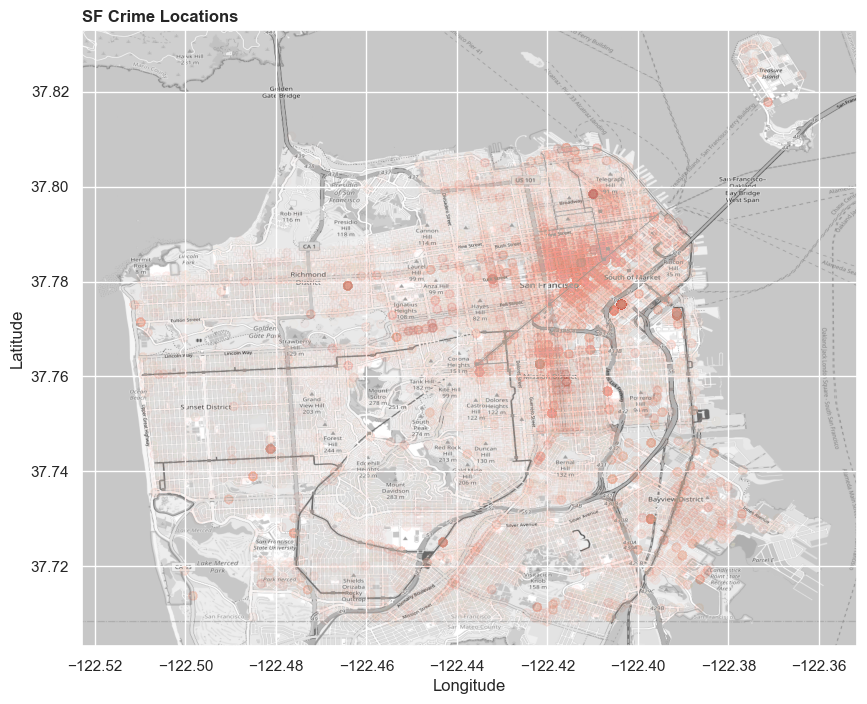

In [29]:
# Assign a color index to each crime category
cr_hist = dict(zip(crime_category_names, range(len(crime_categories))))

# Draw a scatter plot to show the crimes distribution
fig = plt.figure(figsize=(10,8))

# cmap=plt.cm.gist_ncar
cmap=plt.cm.Reds
# cmap=plt.cm.copper
# cmap=plt.cm.cividis

plt.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect='auto')
# plt.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect=1/asp)

plt.scatter(current_clean_df.longitude, current_clean_df.latitude, 
            c=current_clean_df.incident_category.map(cr_hist), cmap=cmap, alpha = 0.01)
plt.title("SF Crime Locations", loc="left", fontdict={"weight": "bold"}, y=1.0)#, fontsize=40)
plt.xlabel('Longitude')#, fontsize=30)
plt.ylabel('Latitude')#, fontsize=30)

fig.savefig(Config.IMAGE_DIR / 'sf_crime_locations_map.png', bbox_inches='tight')
plt.show()

### SF Crime Categories By Location

In [31]:
def plot_long_lat_map(df, categories):
    """
    Plots the 
    """
    
    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(categories)):
        p = plt.subplot(9, 5, i+1)
        crime = categories[i]
        cur_crime_data = df[df.incident_category == crime]
        plt.title(crime + " locations")
        p.imshow(map_img, extent=[longitude_min, longitude_max, latitude_min, latitude_max], aspect='auto')
        p.scatter(cur_crime_data.longitude, cur_crime_data.latitude, c='red', alpha = 0.05)
        plt.xlabel("Longitude")#, fontsize=25)
        plt.ylabel('Latitude')#, fontsize=25)
        # p.set_xticklabels(rotation=30)
        plt.title(f'{crime} locations', fontsize=30)
    
    fig.savefig(Config.IMAGE_DIR / 'sf_crime_categories_map.png', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

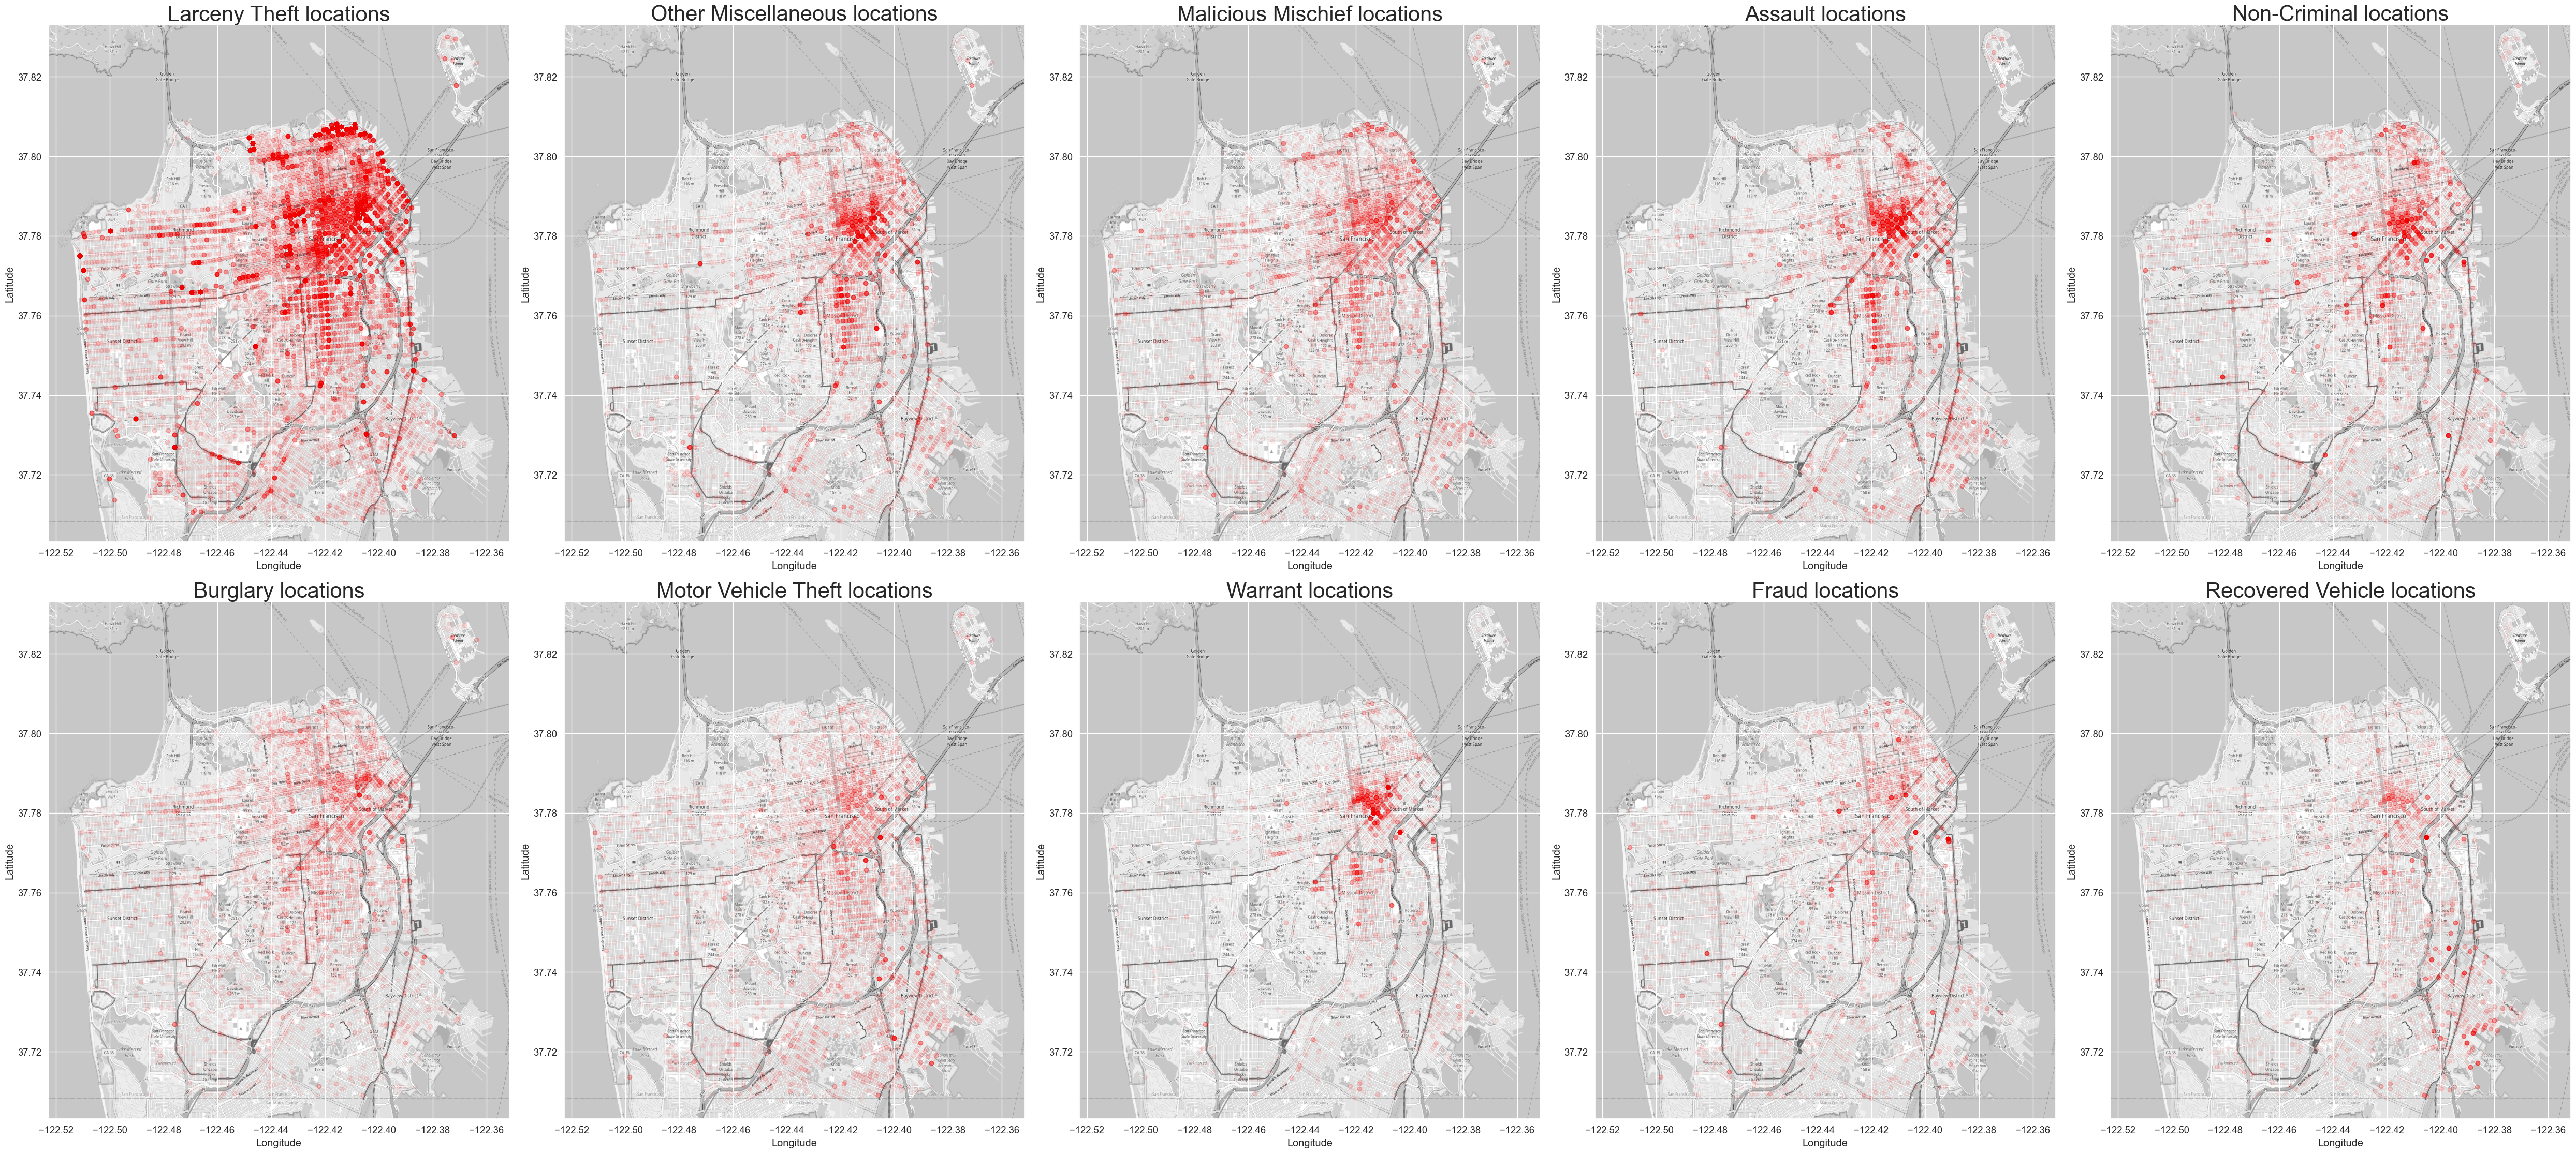

In [32]:
sns.set(font_scale=1.2)
plot_long_lat_map(current_clean_df, crime_category_names[0:10])